k =  1 , Accuracy =  0.5
k =  2 , Accuracy =  0.578125
k =  3 , Accuracy =  0.484375
k =  4 , Accuracy =  0.515625
k =  5 , Accuracy =  0.53125
k =  6 , Accuracy =  0.53125
k =  7 , Accuracy =  0.546875
k =  8 , Accuracy =  0.609375
k =  9 , Accuracy =  0.5625
k =  10 , Accuracy =  0.59375
k =  10 , Accuracy =  0.609375
[[34  4]
 [21  5]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        38
           1       0.56      0.19      0.29        26

    accuracy                           0.61        64
   macro avg       0.59      0.54      0.51        64
weighted avg       0.59      0.61      0.55        64



Text(0, 0.5, 'Mean Error')

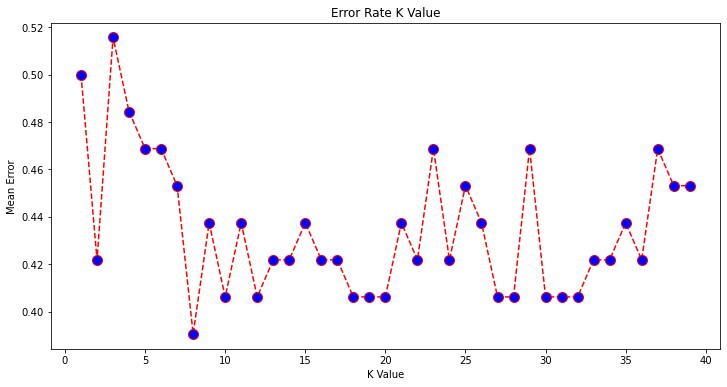

In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from matplotlib import pyplot
import numpy as np
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
clf = DecisionTreeClassifier()
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


data1=pd.read_csv(r'alzheimer.csv')
data1
#Group	M/F	Age	EDUC	SES	MMSE	CDR	eTIV	nWBV	ASF

data.dropna(inplace=True)
data['M/F'].replace(['M', 'F'],[0, 1], inplace=True)                        #Men = 0, Female = 1
data['Group'].replace(['Nondemented', 'Demented'],[0, 1], inplace=True)

data = data.drop(data[data["Group"]=="Converted"].index)

cols=list(data.columns)
x_train,x_test,y_train,y_test = train_test_split(data[cols[1:]],
                                                 data[cols[0:1]],
                                                 train_size=0.8,
                                                 test_size=0.2,
                                                 shuffle=False,
                                                 random_state=20)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

y_train=list(y_train["Group"])
y_test=list(y_test["Group"])

x_train.shape, len(y_train), x_test.shape, len(y_test)

for x in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("k = ", x, ", Accuracy = ",metrics.accuracy_score(y_test, y_pred))
    
#Tested many values of k and k = 8 seems to give the highest level of accuracy with 60.94%
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("k = ", x, ", Accuracy = ",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []
for i in range(1, 40):
    knear = KNeighborsClassifier(n_neighbors=i)
    knear.fit(x_train, y_train)
    pred_i = knear.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
# 8 has the lowest error
plt.ylabel('Mean Error')


In [66]:
#decision tree work
# is classifier correct
x_train.shape, len(y_train), x_test.shape, len(y_test)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.984375


In [56]:
import pydotplus

cols=list(data.columns)
cols
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = cols[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

SyntaxError: invalid syntax (3821195716.py, line 8)

In [68]:
# from sklearn.preprocessing import StandardScaler
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)
# classifier = Sequential()
# classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)
# y_pred = classifier.predict(x_test)
# y_pred = (y_pred > 0.5)
# print(y_pred)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print(accuracy)
#https://towardsdatascience.com/building-your-own-artificial-neural-network-from-scratch-on-churn-modeling-dataset-using-keras-in-690782f7d051

TypeError: ('Keyword argument not understood:', 'init')